In [1]:
%load_ext autoreload
%autoreload 2

from toolz import take
import torch as th
from torch.utils.data import DataLoader
from torch import tensor, optim, nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline

from wxml.model import MLP
from wxml.hamming import make_data_hamming, wt, max_rep, digits_needed, bin_to_dec
from wxml.data import make_splits
from wxml.train import train, count_matches

In [ ]:
digits_needed(63, 2)

In [ ]:
max_rep(2, 8)

In [2]:
batch_size = 32
n_batches = 1000

xs, ys = make_data_hamming(batch_size * n_batches)

[print(xy) for xy in take(5, zip(xs, ys))]

ds_train, ds_val, ds_test = make_splits(xs, ys)
train_loader, val_loader, test_loader = [DataLoader(d, batch_size=batch_size, shuffle=False) for d in [ds_train, ds_val, ds_test]]

(tensor([0., 0., 1., 0., 0., 0., 0., 0.], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 0., 1.], requires_grad=True))
(tensor([0., 0., 0., 1., 0., 1., 0., 0.], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 1., 0.], requires_grad=True))
(tensor([0., 0., 1., 1., 1., 1., 1., 1.], requires_grad=True), tensor([0., 0., 0., 0., 0., 1., 1., 0.], requires_grad=True))
(tensor([0., 0., 0., 0., 1., 1., 1., 0.], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 1., 1.], requires_grad=True))
(tensor([0., 0., 0., 1., 0., 0., 1., 0.], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 1., 0.], requires_grad=True))


In [ ]:
num_layers = 2
input_dim = 8
hidden_dim = 32
output_dim = 8

lr = 1e-3

epochs = 50

model = nn.Sequential(MLP(num_layers, input_dim, hidden_dim, output_dim), nn.Sigmoid())
# model = th.compile(model)
opt = optim.SGD(model.parameters(), lr=lr)
loss_fn = F.binary_cross_entropy

results = train(model, loss_fn, opt, train_loader, val_loader, epochs=epochs, device='mps', dtype=th.float32, print_every=n_batches // 10)


  0%|          | 0/50 [00:00<?, ?it/s]

epoch=0 | train_loss=0.6672 | val_loss=0.6537 | train_acy=0.7023 | val_acy=0.7683
epoch=1 | train_loss=0.6401 | val_loss=0.6262 | train_acy=0.7841 | val_acy=0.7854
epoch=2 | train_loss=0.6117 | val_loss=0.5968 | train_acy=0.7889 | val_acy=0.7993
epoch=3 | train_loss=0.5811 | val_loss=0.5649 | train_acy=0.8071 | val_acy=0.8196
epoch=4 | train_loss=0.5477 | val_loss=0.5301 | train_acy=0.8231 | val_acy=0.8273
epoch=5 | train_loss=0.5116 | val_loss=0.4930 | train_acy=0.8271 | val_acy=0.8293
epoch=6 | train_loss=0.4741 | val_loss=0.4553 | train_acy=0.8244 | val_acy=0.8228
epoch=7 | train_loss=0.4369 | val_loss=0.4193 | train_acy=0.8262 | val_acy=0.8263


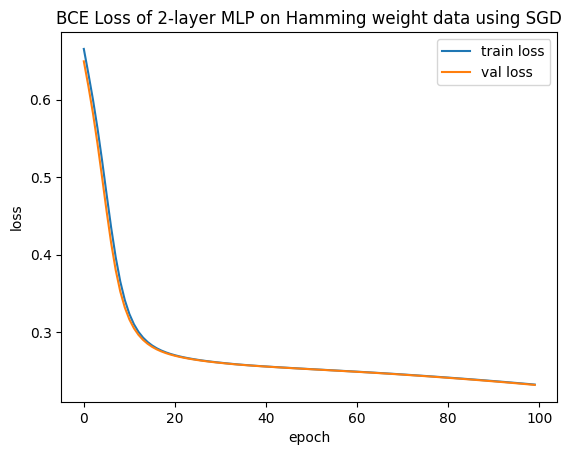

In [ ]:
plt.plot(results['train_losses'], label='train loss')
plt.plot(results['val_losses'], label='val loss')
plt.title("BCE Loss of 2-layer MLP on Hamming weight data using SGD")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

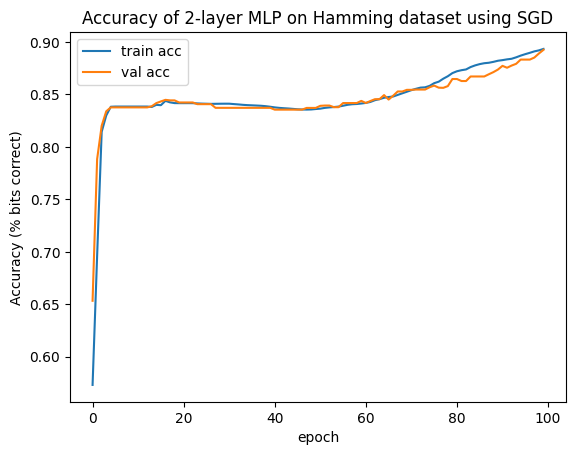

In [6]:
plt.plot(results['train_accuracies'], label='train acc')
plt.plot(results['val_accuracies'], label='val acc')
plt.title("Accuracy of 2-layer MLP on Hamming dataset using SGD")
plt.ylabel("Accuracy (% bits correct)")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
x = tensor([[0, 0, 1, 1, 1, 1, 1, 1]], device='mps').float()

th.set_printoptions(sci_mode=False)
with th.no_grad():
    print(model(x).round())

# TODO: can my model grok hamming distance?